# Principal Component Analysis - New York Weather
I already did principal component analysis for GJ weather analysis so I am going to do NEw york weather data for one month now. 

## Import New York weather and Create Heat Map
Lets import the New York data and check out the correlation before we do the PCA

/var/folders/9n/fytcl6v9593794xbh06tb2f80000gn/T/ipykernel_42696/2743685474.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


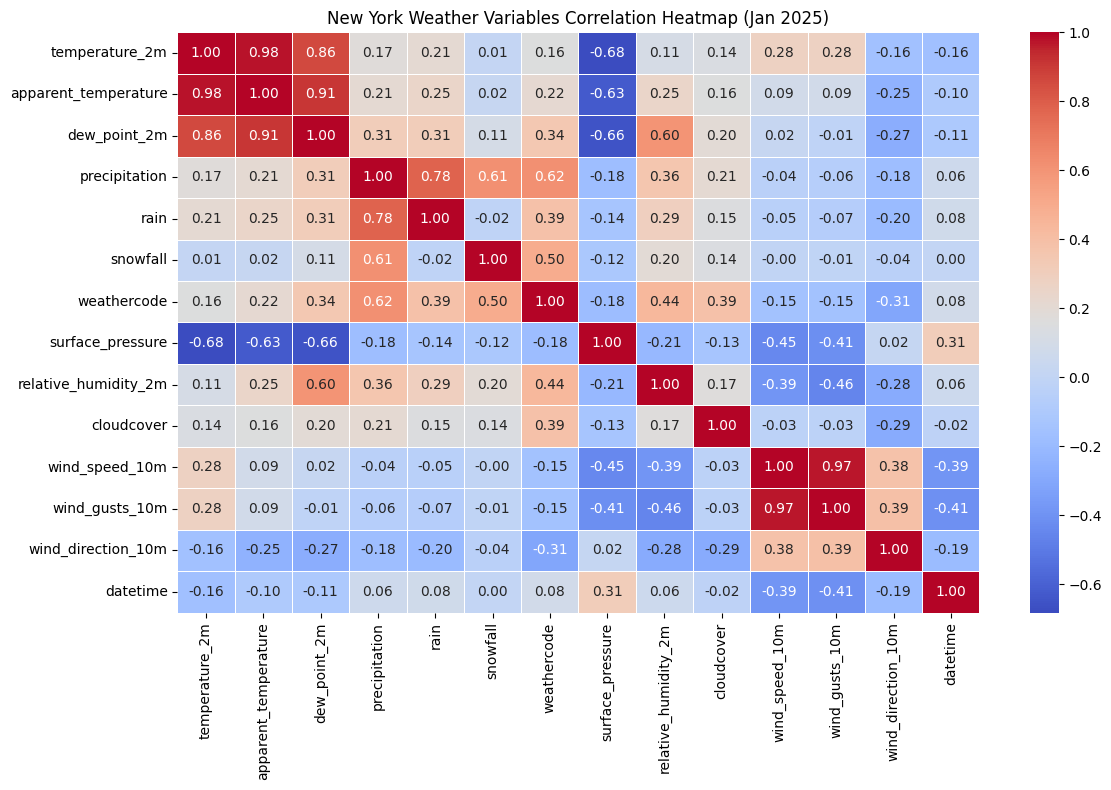

In [22]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1️⃣ Import New York weather data
# --------------------------
latitude = 40.7128
longitude = -74.0060

url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    "&start_date=2025-01-01&end_date=2025-01-31"
    "&hourly=temperature_2m,apparent_temperature,dew_point_2m,"
    "precipitation,rain,snowfall,weathercode,"
    "surface_pressure,relative_humidity_2m,cloudcover,"
    "wind_speed_10m,wind_gusts_10m,wind_direction_10m"
    "&timezone=America%2FNew_York"
)

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data["hourly"])
df["datetime"] = pd.to_datetime(df["time"])
df.drop(columns=["time"], inplace=True)

# Convert all numeric columns to float (for correlation)
df = df.apply(pd.to_numeric, errors="ignore")

# --------------------------
# 2️⃣ Compute correlation matrix
# --------------------------
corr = df.corr(numeric_only=True)

# --------------------------
# 3️⃣ Plot heatmap
# --------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("New York Weather Variables Correlation Heatmap (Jan 2025)")
plt.tight_layout()
plt.show()


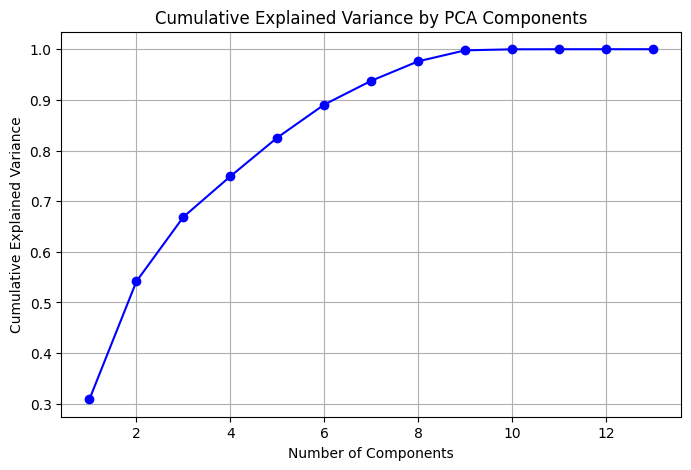

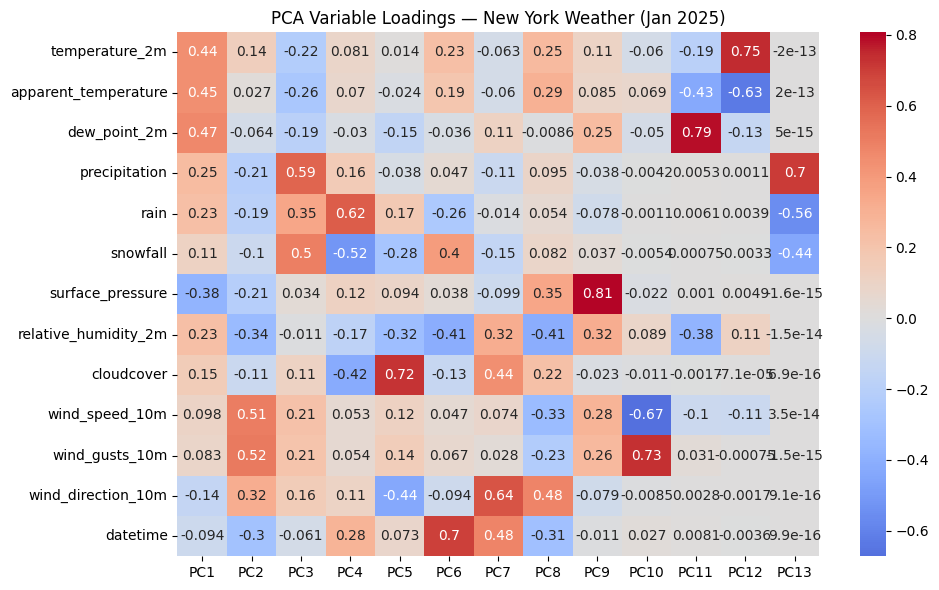

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare numeric data ---
df_numeric = df.select_dtypes(include='number').dropna()
df_numeric = df_numeric.drop(columns=['weathercode'], errors='ignore')

# --- Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# --- Run PCA ---
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# --- Explained variance plot ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', color='b')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# --- PCA loadings heatmap ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df_numeric.columns))],
    index=df_numeric.columns
)

plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", center=0, annot=True)
plt.title("PCA Variable Loadings — New York Weather (Jan 2025)")
plt.tight_layout()
plt.show()


### Results Summary: 
Since we are dealing with a lot more variables compared to the Grand Junction Weather Data, we naturally will need more principal components in order to explain more of the data. In the skree graph, we can see the first two components will cover 0.5 of the variance. However we will need 6 principal components to be able to explain 90% of the data. The loadings tell us generally how much of each variable we are covering with each principal component. The first one covers a lot of the temperatures, then the wind speeds, precipitation and so on. 